# Analysis for a 3 quantum damping channel discrimination

In [38]:
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 

from typing import cast, Tuple, List
from qcd import load_object_from_file
from qcd.typings.configurations import OptimalConfigurations
from qcd.configurations import OneShotConfiguration
import math
import matplotlib.pyplot as plt

In [40]:
def get_number_eta_pairs(eta_groups)->int:
    eta_third = eta_groups[0][2]
    number_eta_pairs = 0
    for eta_group in eta_groups:
        if eta_group[2] != eta_third:
            return number_eta_pairs
        number_eta_pairs += 1

In [58]:
def get_etas_and_probabilities_from_optimal_results(optimal_results: OptimalConfigurations)-> List[dict]:
    """ From the optimal results, obtain the etas and the result probabilities for each 3-eta execution.
        Return a list of etas used (in degrees) and the probabilities with the associated eta pair.
    """
    probabilities = []
    eta_pairs = []
    etas_third_channel = []
    
    for idx, configuration in enumerate(optimal_results['configurations']):
        eta_pairs.append((int(math.degrees(cast(OneShotConfiguration, configuration).eta_group[0])),
                         int(math.degrees(cast(OneShotConfiguration, configuration).eta_group[1]))))
        etas_third_channel.append(int(math.degrees(cast(OneShotConfiguration, configuration).eta_group[2])))
        probabilities.append(optimal_results['probabilities'][idx])

    number_eta_pairs = get_number_eta_pairs(eta_groups=optimal_results['eta_groups'])
    number_third_channels = int(len(optimal_results['eta_groups']) / number_eta_pairs)

    results_to_plot = [{'error_probabilities': [],'etas_third_channel': [],'eta_pair':(0,0)} for i in range(number_eta_pairs)]
    
    for idx, (probability, eta_third, eta_pair) in enumerate(zip(probabilities, etas_third_channel, eta_pairs)):
        results_to_plot[idx % number_eta_pairs]['error_probabilities'].append(1-probability)
        results_to_plot[idx % number_eta_pairs]['etas_third_channel'].append(eta_third)
        results_to_plot[idx % number_eta_pairs]['eta_pair'] = eta_pair
    return results_to_plot
    

In [85]:
def plot_3channel_results(parsed_results: List[dict], algorithm:str = '')-> None:
    number_third_etas = len(parsed_results)
    
    fig = plt.figure(figsize=(25, 10))
    sup_title = 'Error Probabilities'
    sup_title += f' with {algorithm}' if algorithm != '' else ''
    fig.suptitle(sup_title, fontsize=20)
    
    for idx, parsed_result in enumerate(parsed_results):
        title = f"Eta pair ({parsed_result['eta_pair'][0]},{parsed_result['eta_pair'][1]})"
        ax = fig.add_subplot(2, 3, idx+1 % 3)
        ax.set_ylim([0,1])
        # ax.set_ylim([0.33,0.67])
        ax.set_title(title, fontsize=14)
        ax.set_xlabel('Channel 3 (angle $\eta$)')
        ax.set_ylabel('Probability Error')
        ax.plot(parsed_result['etas_third_channel'], parsed_result['error_probabilities'])
    plt.show()

In [69]:
results = load_object_from_file(name='20210414b_C2_A2_1000_10000_3_1_20', path='../demo/data/')

In [70]:
parsed_results = get_etas_and_probabilities_from_optimal_results(optimal_results=results)

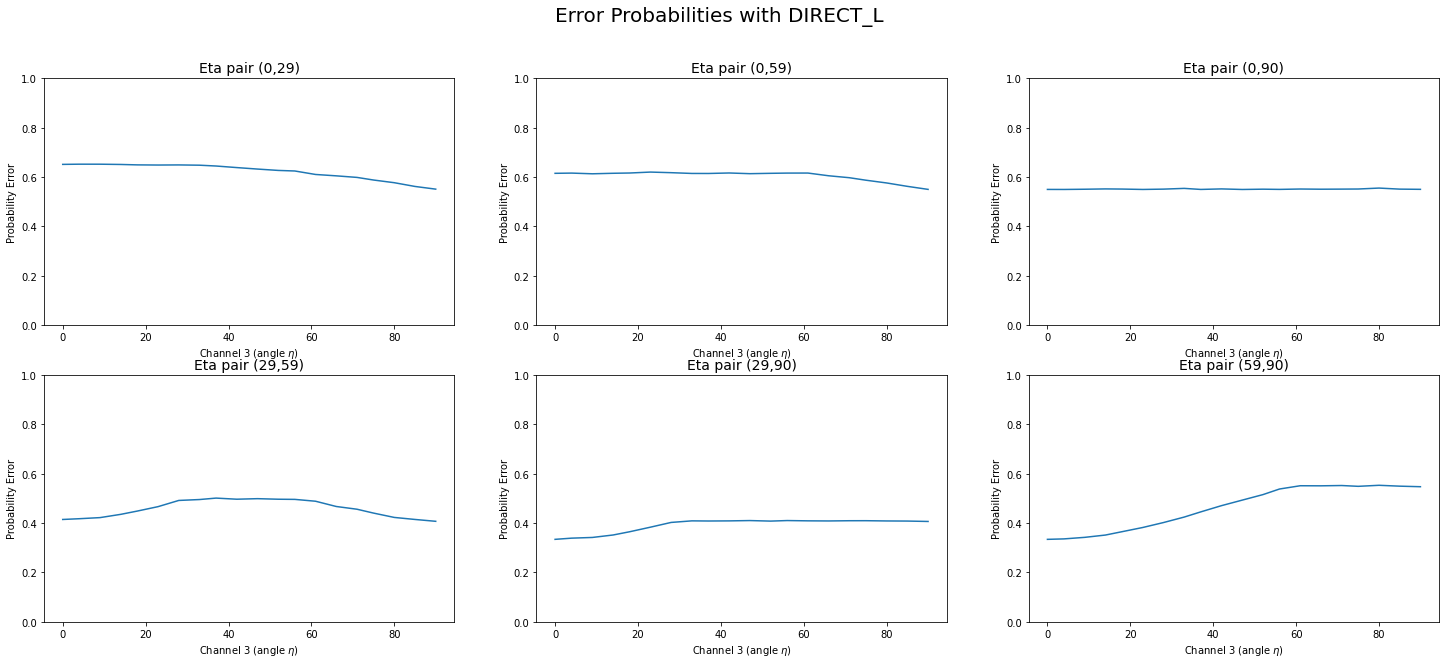

In [86]:
plot_3channel_results(parsed_results=parsed_results, algorithm='DIRECT_L')

In [62]:
results_crs = load_object_from_file(name='20210416a_C2_A1_1000_10000_3_6_20', path='../demo/data/')
parsed_crs_results = get_etas_and_probabilities_from_optimal_results(optimal_results=results_crs)

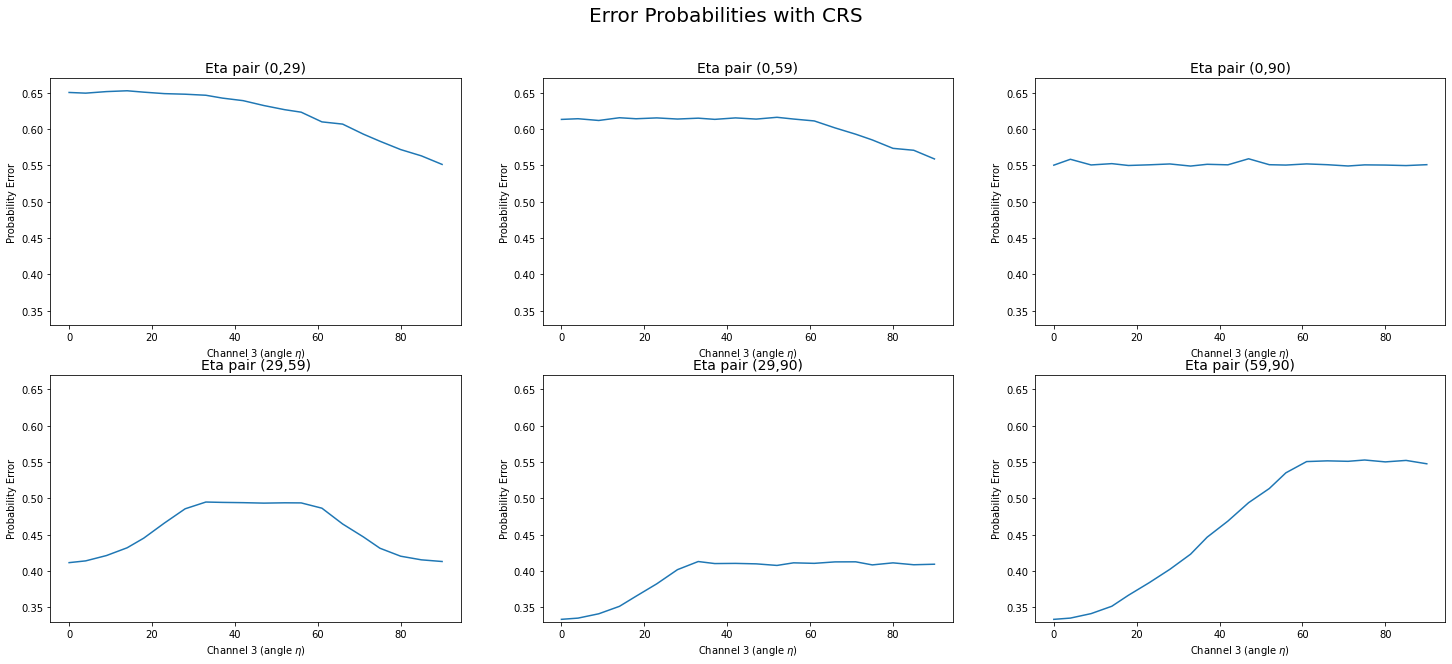

In [83]:
plot_3channel_results(parsed_results=parsed_crs_results, algorithm='CRS')

In [66]:
results_ESCH = load_object_from_file(name='20210416b_C2_A4_A5_1000_10000_3_6_20', path='../demo/data/')
parsed_ESCH_results = get_etas_and_probabilities_from_optimal_results(optimal_results=results_ESCH)

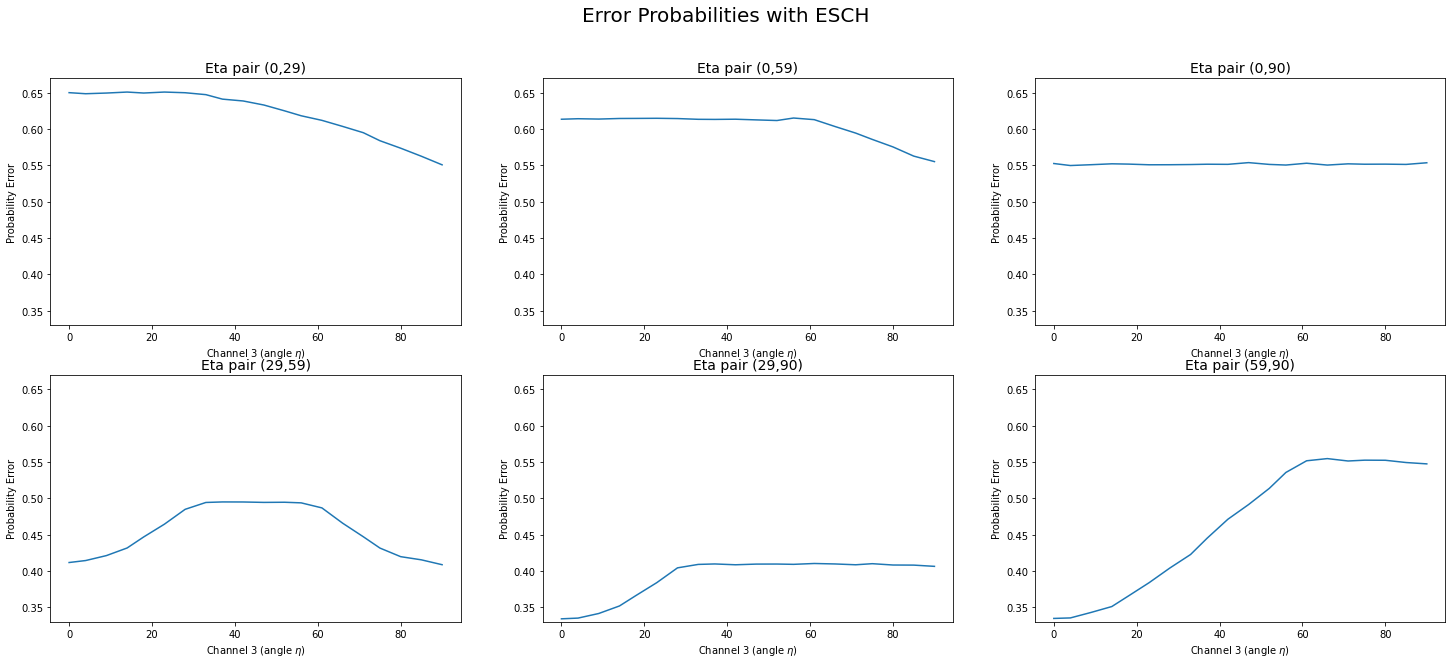

In [84]:
plot_3channel_results(parsed_results=parsed_ESCH_results, algorithm='ESCH')

In [56]:
len(results_other)

5

In [57]:
results_other[0]

{'eta_groups': [[0.0, 0.5235987755982988, 0.0],
  [0.0, 1.0471975511965976, 0.0],
  [0.0, 1.5707963267948966, 0.0],
  [0.5235987755982988, 1.0471975511965976, 0.0],
  [0.5235987755982988, 1.5707963267948966, 0.0],
  [1.0471975511965976, 1.5707963267948966, 0.0],
  [0.0, 0.5235987755982988, 0.08267349088394192],
  [0.0, 1.0471975511965976, 0.08267349088394192],
  [0.0, 1.5707963267948966, 0.08267349088394192],
  [0.5235987755982988, 1.0471975511965976, 0.08267349088394192],
  [0.5235987755982988, 1.5707963267948966, 0.08267349088394192],
  [1.0471975511965976, 1.5707963267948966, 0.08267349088394192],
  [0.0, 0.5235987755982988, 0.16534698176788384],
  [0.0, 1.0471975511965976, 0.16534698176788384],
  [0.0, 1.5707963267948966, 0.16534698176788384],
  [0.5235987755982988, 1.0471975511965976, 0.16534698176788384],
  [0.5235987755982988, 1.5707963267948966, 0.16534698176788384],
  [1.0471975511965976, 1.5707963267948966, 0.16534698176788384],
  [0.0, 0.5235987755982988, 0.24802047265182575